# Actionable Intelligence: Open Source Intelligence, LLM and Knowledge Graph for CSOs	

A talk by [miaoski](https://miaoski.github.io/) and GD at RightsCon 2025.

*Civil Society Cyber Shield (CSCS) / Open Culture Foundation*

<img src="img/cscs-logo.png" width="20%" /> <img src="img/OCF-logo.png" width="20%" />

## Why?

CSO might not have the resource to collect, monitor, and analyze Cyber Threat Intelligence about their daily operation.

## Goals

- To collect, summarize, visualize and most importantly prioritize actionable intelligence
- To improve the (cyber)security of the organizations and individuals.

## Define the Priority Intelligence Requirements (PIR)

Cyber Underground General Intelligence Requirements Handbook ([CU-GIRH](https://intel471.com/resources/cyber-underground-handbook)) from Intel 471 is a very handy reference. It is compatible with [OASIS STIX 2.1](https://docs.oasis-open.org/cti/stix/v2.1/os/stix-v2.1-os.html).

<img src="img/CU-GIRH.png" width="30%" />

The handbook provides a thorough list of General Intelligence Requirements (GIRs), from which a CSO can decide what are the most important / concerning items. 

<img src="img/CU-GIRH-1.png" width="50%" />
<img src="img/CU-GIRH-2.png" width="50%" />

You are encouraged to download the book and attend their workshop (if available), as their **Intelligence Planning Workbook** is not publicly available. The workbook looks like this.

![Sample Collection Plan](img/Intel-Planning-Workbook.png)

## Set Google alerts

After defining what most concerns you, use a Googel Account, preferably the automation account in your G-Suite for NGO plan, to subscribe to Google Alerts. For example, for Tibetan CSO and Uyghur CSO, they might want to use these keywords:
- Cybersecurity Tibet
- Cybersecurity Uyghur
- Spyware Uyghur
- Trend Micro Uyghur
- Unit42 Tibet
- etc.

It is recommended to select "All Language" / "Any Region".

<img src="img/Cybersecurity Tibet.png" width="50%" /><img src="img/Spyware Alert.png" width="50%" />

## Receive alerts via email
Sooner or later, you get incoming alerts in your mailbox. For example,

<img src="img/AP.png" width="50%" />
<img src="img/The Record.png" width="50%" />

Sometimes you have to click a few links to download the original threat intelligence report.

<img src="img/VOA.png" width="50%" />
<img src="img/VOA Spyware as a service.png" width="50%" />
<img src="img/Download the PDF.png" width="50%" />
<img src="img/TRB4 PDF.png" width="50%" />

## Vendors' reports are very useful

Trend Micro, Unit 42 (Palo Alto Networks), CISCO Talos, Google Threat Intelligence, Recorded Future, ... are all industrial leaders. Their threat analysis reports are of good quality.

<img src="img/Trend Micro - Moonshine EK.png" width="50%" />
<img src="img/Google Blog.png" width="50%" />

## Paste the URLs to the Notebook

Just paste the URLs from the incoming alerts here.

⚠️ Some website doesn't welcome automation scripts. We found most cybersecurity vendors are willing to share, though.

In [3]:
import os
import requests
HTML_SOURCE_PATH = './source'

In [18]:
# Download the URL
URLS = """\
https://cloud.google.com/blog/topics/threat-intelligence/pro-prc-haienergy-us-news
https://edition.cnn.com/2021/03/24/tech/uyghurs-hacking/index.html
https://www.trendmicro.com/en_us/research/24/l/earth-minotaur.html
https://therecord.media/china-linked-tibetan-group-hacked-sites
https://www.lookout.com/threat-intelligence/article/badbazaar-surveillanceware-apt15
https://cloud.google.com/blog/topics/threat-intelligence/pro-prc-haienergy-us-news
"""

def do_scrape(url):
    """Equivalent to
    wget --user-agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36' -x -l 1 $1
    """
    header = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36',
        'Referer': 'https://www.google.com/',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.5',
    }
    source_real_path = os.path.realpath(HTML_SOURCE_PATH)
    uri = url.split('://')[1].split('?')[0].split('#')[0].split('&')[0]
    if os.path.exists(os.path.join(source_real_path, uri)):
        print(f'⏭ Already downloaded: {url}')
        return
    r = requests.get(url, headers=header)
    if r.status_code != 200:
        print(f'❌ Failed to fetch {url}, status code {r.status_code}]')
        return
    content = r.text

    # Note that we used r.url here to reflect the redirection chain
    uri = r.url.split('://')[1].split('?')[0].split('#')[0].split('&')[0]
    html_fn = os.path.join(source_real_path, uri)
    if html_fn[-1] == '/':
        html_fn += 'index.html'
    assert os.path.realpath(html_fn)[:len(source_real_path)] == source_real_path     
    if not os.path.exists(os.path.dirname(html_fn)):
        os.makedirs(os.path.dirname(html_fn))
    with open(html_fn, 'w', encoding='utf-8') as f:
        f.write(content)
    print(f'✅ Saved as {html_fn}')

# Download 'em!
for url in URLS.split('\n'):
    url = url.strip()
    if url:
        do_scrape(url)

⏭ Already downloaded: https://cloud.google.com/blog/topics/threat-intelligence/pro-prc-haienergy-us-news
⏭ Already downloaded: https://edition.cnn.com/2021/03/24/tech/uyghurs-hacking/index.html
⏭ Already downloaded: https://www.trendmicro.com/en_us/research/24/l/earth-minotaur.html
⏭ Already downloaded: https://therecord.media/china-linked-tibetan-group-hacked-sites
⏭ Already downloaded: https://www.lookout.com/threat-intelligence/article/badbazaar-surveillanceware-apt15
⏭ Already downloaded: https://cloud.google.com/blog/topics/threat-intelligence/pro-prc-haienergy-us-news


In [19]:
# Conver the HTML to TXT
from html2text import HTML2Text
from glob import glob
import re

html2text = HTML2Text()
html2text.ignore_links = True
html2text.ignore_images = True
html2text.body_width = 0
source_real_path = os.path.realpath(HTML_SOURCE_PATH)

for fn in glob(source_real_path + '/**', recursive=True):
    if not os.path.isfile(fn):
        continue
    if not fn.endswith('.txt'):
        txt_fn = fn.replace('.html', '.txt')
        if not txt_fn.endswith('.txt'):
            txt_fn += '.txt'
        if os.path.exists(txt_fn):
            print(f'⏭ Already converted: {txt_fn}')
            continue
        print(f'📝 Converting {fn} → {txt_fn}')
        with open(fn, encoding='utf-8') as f:
            text = html2text.handle(f.read())
            text = re.sub("\n[ \t]+", "\n", text)
            text = re.sub("\n\n+", "\n\n", text)
        with open(txt_fn, 'w', encoding='utf-8') as f:
            f.write(text)

⏭ Already converted: /home/phil/miaoski/rightscon/source/edition.cnn.com/2021/03/24/tech/uyghurs-hacking/index.txt
⏭ Already converted: /home/phil/miaoski/rightscon/source/www.trendmicro.com/en_us/research/24/l/earth-minotaur.txt
⏭ Already converted: /home/phil/miaoski/rightscon/source/therecord.media/china-linked-tibetan-group-hacked-sites.txt
⏭ Already converted: /home/phil/miaoski/rightscon/source/www.lookout.com/threat-intelligence/article/badbazaar-surveillanceware-apt15.txt
⏭ Already converted: /home/phil/miaoski/rightscon/source/cloud.google.com/blog/topics/threat-intelligence/pro-prc-haienergy-us-news.txt


# Extract the intelligence with OpenAI GPT-4o

Or a local LLM, if you have enough computing power that runs Llama 3.3 70B or better models. It is recommended to use a model that supports tool calling.

In [20]:
report = open('./sources/www.trendmicro.com/en_us/research/24/l/earth-minotaur.txt').read()

In [21]:
import os
import dotenv
import instructor
from pydantic import BaseModel, Field
from typing import Optional
from datetime import date
import openai

dotenv.load_dotenv()

model = openai.AzureOpenAI(
    api_version='2023-05-15',
    azure_endpoint=os.getenv('OPENAI_API_BASE'),
    api_key=os.getenv('OPENAI_API_KEY'))

# For a local LLM, uncomment the following lines.
# model = openai.OpenAI(
#         base_url="http://192.168.2.3:11434/v1",
#         api_key="ollama")

class CTI_Report_in_STIX_21(BaseModel):
    """
    Extract cyberthreat intelligence (CTI) report to structured data in STIX 2.1 spec.
    """
    publish_date: date = Field(..., description="Publish date of the CTI report")
    summary: str = Field(..., description="One line summary of the main event in the CTI report")
    intrustion_set: Optional[list[str]] = Field(None, description="List of intrusion set (attacker, adversary) in this event, such as APT41, Void Typhoon, Pawn Storm, etc.")
    campaign: Optional[list[str]] = Field(None, description="List of attacking campaign of this event. Campaign is usually prefixed with Operation, such as Operation Dream Job.")
    malware: Optional[list[str]] = Field(None, description="List of malware, exploit kits, hacking tools used in this event, such as COBEACON, Angler Exploit Kit, China Chopper, etc.")
    vulnarabilities: Optional[list[str]] = Field(None, description="List of CVE, GHSA, ZDI numbers or named vulnerabilities being exploited in this event. Vulnerability can also have names, for example, HeartBleed, Spectre.")
    victim_orgs: Optional[list[str]] = Field(None, description="List of victim companies, NGO/CSO/NPO, communities, diasporas, governments, cloud service providers, ISP, telco, etc., which are targeted by the intrusion set(s) or attacked by the malware. Diasporas can be attacked or targeted, such as Uyghur Diaspora, Tibetan Diaspora, Russian-speaking Community, etc.")
    targeted_countries: Optional[list[str]] = Field(None, description="List of countries/regions/cities that the adversary targets in this event")
    targeted_software: Optional[list[str]] = Field(None, description="List of software being targeted/exploited in this event, for example, Windows 10, Windows 11, TOMCAT, Apache Struts, Microsoft Office, Adobe Flash")
    targeted_hardware: Optional[list[str]] = Field(None, description="List of hardware being targeted/exploited in this event. Specify the impacted model and versions, if possible. For example, Siemens S7-1200 PLC, Asus RT-AC86U version before 3.0.0.4.386_51915.")


# Patch the OpenAI client
client = instructor.from_openai(model)

# Extract structured data from natural language
user_info = client.chat.completions.create(
    # model='zac/phi4-tools',            # phi4-tools works, if you have limited VRAM
    model="gpt-4o",
    response_model=CTI_Report_in_STIX_21,
    messages=[{"role": "user", "content": report}],
)

In [22]:
user_info

CTI_Report_in_STIX_21(publish_date=datetime.date(2024, 12, 5), summary="Trend Micro researchers investigated Earth Minotaur's use of the MOONSHINE exploit kit and the DarkNimbus backdoor to exploit Android instant messaging app vulnerabilities, targeting Tibetan and Uyghur communities for surveillance.", intrustion_set=['Earth Minotaur'], campaign=None, malware=['MOONSHINE exploit kit', 'DarkNimbus backdoor'], vulnarabilities=['CVE-2016-1646', 'CVE-2016-5198', 'CVE-2017-5030', 'CVE-2017-5070', 'CVE-2018-6065', 'CVE-2018-17463', 'CVE-2018-17480', 'CVE-2020-6418', 'CVE-2023-3420'], victim_orgs=['Tibetan Community', 'Uyghur Community'], targeted_countries=['China'], targeted_software=['Android instant messaging apps', 'Chromium-based browsers', 'Chrome', 'Tencent Browser Server', 'WeChat', 'Facebook', 'Lazada', 'Line', 'Messenger', 'Naver', 'QQ', 'Zalo'], targeted_hardware=None)

In [1]:
import networkx as nx
G = nx.Graph()

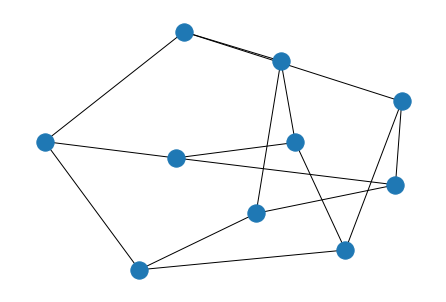

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
g1 = nx.petersen_graph()
nx.draw(g1)
plt.show()

# Visualization

NetworkX visualization is static. If you want to move nodes around, Cytoscape is a good choice.

In [3]:
import ipycytoscape

In [6]:
cyto = ipycytoscape.CytoscapeWidget()
cyto.graph.add_graph_from_networkx(g1)
cyto.set_layout(name='cola',
                animate=True,
                randomize=False)

In [7]:
cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'animate': True, 'randomize': False}, cytoscape_style=[{'sel…

# Dependencies

The notebook uses the following pipy packages:
- html2text==2024.2.26
- openai==1.60.1
- python-dotenv==1.0.1
- instructor==1.7.2
- pydantic==2.10.6
- networkx==3.4.2

You may want to use newer versions of the dependencies. Uncomment the next cell to install the dependencies. Remember to restart Python kernel to reload the modules.


# License
[CC-BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en) Open Culture Foundation, except screenshots from respective copyright holders.

In [ ]:
# !pip install html2text openai python-dotenv instructor pydantic